In [1]:
# Cell 1: Clear cache and reinstall from main branch
!pip cache purge
!pip install --no-cache-dir git+https://github.com/nicenzhou/edge-gwas.git@main

Files removed: 0
  Cloning https://github.com/nicenzhou/edge-gwas.git (to revision main) to /private/var/folders/x_/6k45gs0x2l10rxc3kvrwlly80000gn/T/pip-req-build-xgmrf8r1
  Running command git clone --filter=blob:none --quiet https://github.com/nicenzhou/edge-gwas.git /private/var/folders/x_/6k45gs0x2l10rxc3kvrwlly80000gn/T/pip-req-build-xgmrf8r1
  Resolved https://github.com/nicenzhou/edge-gwas.git to commit 0e3bf7330b2865591a2a638b310a3b2910014a6e
  Preparing metadata (setup.py) ... done


In [2]:
# Cell 2: Load the functions from package
from edge_gwas import *
import pandas as pd
from IPython.display import Image, display

In [3]:
# Cell 3: Download test files to default 'tests' directory
download_test_files(version='main',overwrite=True)

INFO:edge_gwas.io_handlers:Downloading test files to tests


⬇ Downloading: test.bed... 

INFO:edge_gwas.io_handlers:Downloaded test.bed from https://raw.githubusercontent.com/nicenzhou/edge-gwas/main/tests/test.bed
INFO:edge_gwas.io_handlers:Downloaded test.bim from https://raw.githubusercontent.com/nicenzhou/edge-gwas/main/tests/test.bim


✓ (0.94 MB)
⬇ Downloading: test.bim... ✓ (0.03 MB)
⬇ Downloading: test.fam... 

INFO:edge_gwas.io_handlers:Downloaded test.fam from https://raw.githubusercontent.com/nicenzhou/edge-gwas/main/tests/test.fam


✓ (0.07 MB)
⬇ Downloading: test.phen... 

INFO:edge_gwas.io_handlers:Downloaded test.phen from https://raw.githubusercontent.com/nicenzhou/edge-gwas/main/tests/test.phen


✓ (0.09 MB)

Summary:
  ✓ Downloaded: 4
  ⊙ Skipped: 0
  ✗ Failed: 0


{'downloaded': ['test.bed', 'test.bim', 'test.fam', 'test.phen'],
 'skipped': [],
 'failed': []}

In [4]:
# Cell 4: Load data
geno, info = load_plink_data('tests/test.bed', 'tests/test.bim', 'tests/test.fam')

INFO:edge_gwas.utils:Loading PLINK data from tests/test.bed
Mapping files: 100%|██████████████████████████████| 3/3 [00:00<00:00, 42.52it/s]
INFO:edge_gwas.utils:Loaded 3925 samples and 1000 variants


In [5]:
# Cell 5: Prepare phenotype (adjust column names as needed)
# First, check what columns are in test.pheno
pheno_raw = pd.read_csv('tests/test.phen', sep='\t')

# Then prepare phenotype with correct column names
pheno = prepare_phenotype_data(
    'tests/test.phen', 
    outcome_col='disease',
    covariate_cols=[],  # Empty list - no covariates
    sep=' '
)

INFO:edge_gwas.utils:Loading phenotype data from tests/test.phen
INFO:edge_gwas.utils:Prepared phenotype data for 3925 samples


In [6]:
# Cell 6: Split data
from edge_gwas.utils import stratified_train_test_split
train_g, test_g, train_p, test_p = stratified_train_test_split(
    geno, pheno, 'disease', 
    test_size=0.5, 
    random_state=42,
    geno_id_col='sample_id',
    pheno_id_col='IID'
)

INFO:edge_gwas.utils:Splitting data into train/test (50%/50%)
INFO:edge_gwas.utils:Found 3925 common samples (dropped 0 from genotype, 0 from phenotype)


INFO:edge_gwas.utils:Training set: 1962 samples
INFO:edge_gwas.utils:Test set: 1963 samples
INFO:edge_gwas.utils:Training cases/controls: 12/1950 (0.6% cases)
INFO:edge_gwas.utils:Test cases/controls: -15/1978 (-0.8% cases)


In [7]:
# Cell 7: Run EDGE analysis
edge = EDGEAnalysis(outcome_type='continuous', n_jobs=-1)
alpha_df, gwas_df = edge.run_full_analysis(
    train_g, train_p, test_g, test_p,
    outcome='disease',
    covariates=[]
)

INFO:edge_gwas.core:Starting EDGE analysis...
INFO:edge_gwas.core:Step 1: Calculating alpha values on training data...
INFO:edge_gwas.core:Processing variant 100/1000
INFO:edge_gwas.core:Processing variant 200/1000
INFO:edge_gwas.core:Processing variant 300/1000
INFO:edge_gwas.core:Processing variant 400/1000
INFO:edge_gwas.core:Processing variant 500/1000
INFO:edge_gwas.core:Processing variant 600/1000
INFO:edge_gwas.core:Processing variant 700/1000
INFO:edge_gwas.core:Processing variant 800/1000
INFO:edge_gwas.core:Processing variant 900/1000
INFO:edge_gwas.core:Processing variant 1000/1000
INFO:edge_gwas.core:Alpha calculation complete. Processed 1000 variants.
INFO:edge_gwas.core:Skipped 0 variants due to convergence issues.
INFO:edge_gwas.core:Step 2: Applying alpha values on test data...
INFO:edge_gwas.core:Processing variant 100/1000
INFO:edge_gwas.core:Processing variant 200/1000
INFO:edge_gwas.core:Processing variant 300/1000
INFO:edge_gwas.core:Processing variant 400/1000
INF

In [8]:
# Cell 8: Display results
print("\nTop significant SNPs:")
print(gwas_df.nsmallest(10, 'pval'))


Top significant SNPs:
            snp      coef   std_err      stat      pval  conf_int_low  \
883   rs6664000 -0.257674  0.067214 -3.833641  0.000131     -0.389501   
877  rs10864366 -0.297638  0.079924 -3.724039  0.000202     -0.454392   
36    rs2474460 -0.230496  0.067313 -3.424254  0.000629     -0.362507   
869   rs4908773 -0.279175  0.083914 -3.326927  0.000894     -0.443745   
359   rs1710421 -0.036058  0.010943 -3.295020  0.001002     -0.057520   
828   rs9434617 -0.114979  0.035086 -3.277081  0.001067     -0.183788   
850   rs6678140 -0.165603  0.050958 -3.249802  0.001174     -0.265541   
108    rs897615 -0.068608  0.021687 -3.163558  0.001582     -0.111140   
743   rs2796477  0.168514  0.057374  2.937123  0.003355      0.055987   
892  rs11121247 -0.118142  0.040310 -2.930823  0.003420     -0.197198   

     conf_int_high  n_samples  alpha_value  variant_id  
883      -0.125848       1780    -0.672885   rs6664000  
877      -0.140884       1779    -0.520977  rs10864366  
36

QQ plot saved to qq.png
Genomic inflation factor (λ): 1.015
Lambda GC: 1.015


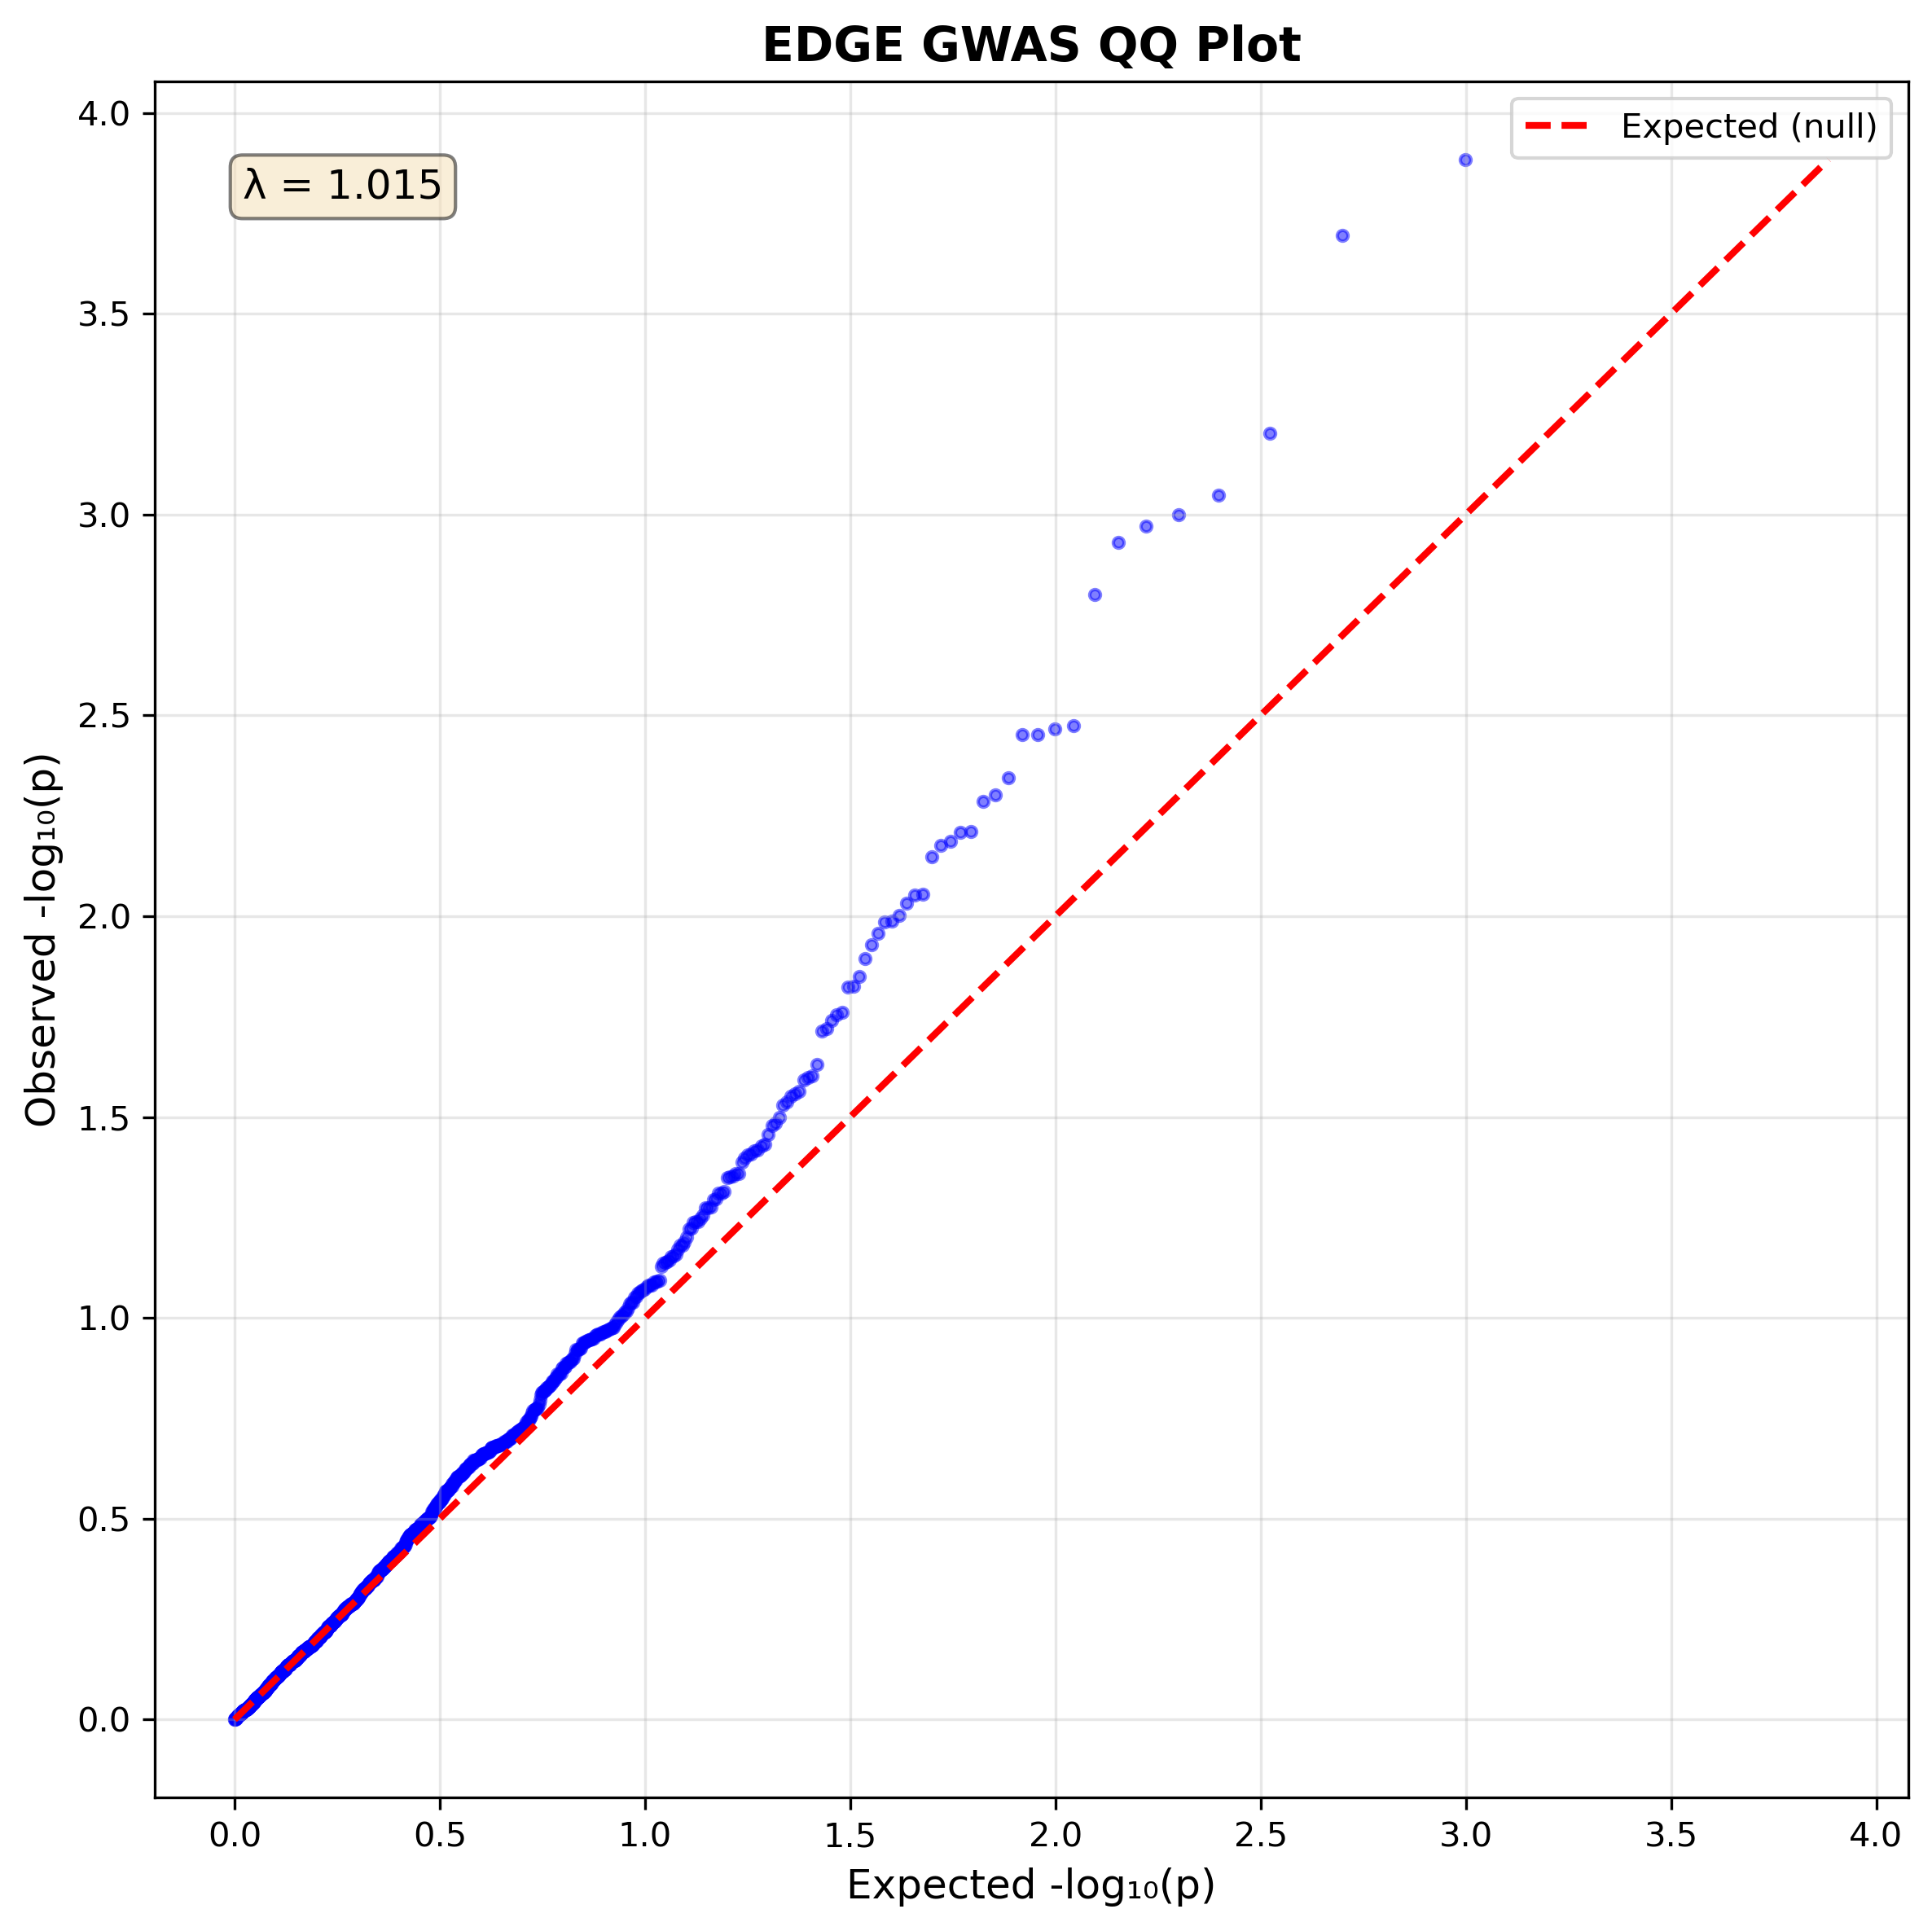

In [9]:
# Cell 9: Visualize
# NO CHROM INFO DO NOT RUN
#manhattan_plot(gwas_df, 'manhattan.png')
#display(Image('manhattan.png'))

lambda_gc = qq_plot(gwas_df, 'qq.png')
print(f"Lambda GC: {lambda_gc:.3f}")
display(Image('qq.png'))